In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


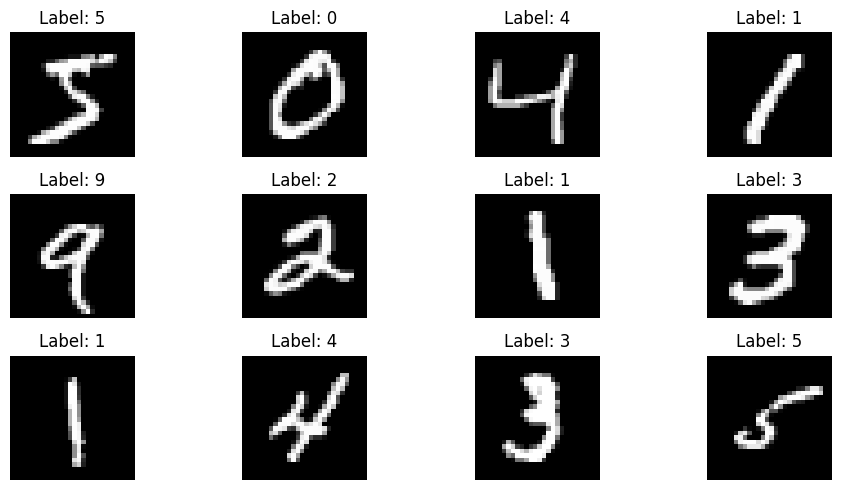

In [2]:
# dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization: 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# data visualization
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
# starting the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 28x28
    Dense(128, activation='relu'),  # first hidden layer
    Dense(10, activation='softmax')  # output layer
])

# Modeli compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Model summary


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Model train
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8783 - loss: 0.4290 - val_accuracy: 0.9584 - val_loss: 0.1376
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9651 - loss: 0.1208 - val_accuracy: 0.9714 - val_loss: 0.0984
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0781 - val_accuracy: 0.9754 - val_loss: 0.0817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9838 - loss: 0.0539 - val_accuracy: 0.9736 - val_loss: 0.0844
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9782 - val_loss: 0.0731


In [5]:
# performance on data set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 0s - 1ms/step - accuracy: 0.9782 - loss: 0.0731
Test Loss: 0.0731
Test Accuracy: 0.9782


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


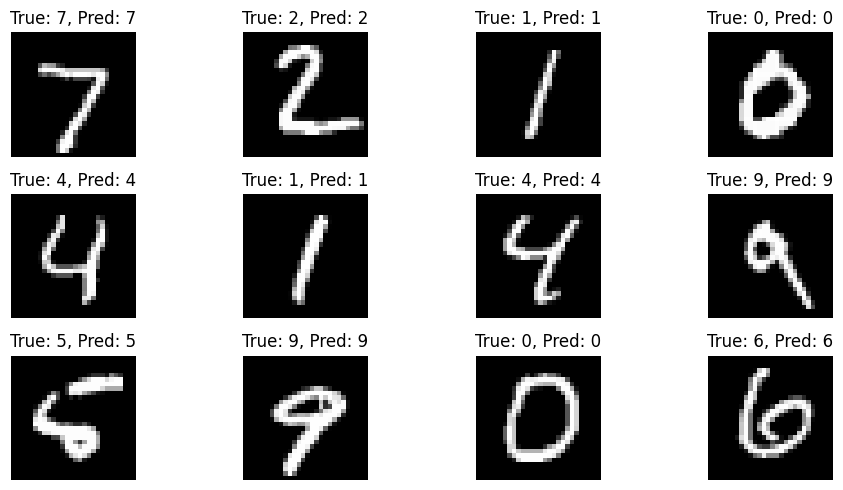

In [6]:
# few predictions
predictions = model.predict(x_test)

# visualize
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
# Save model
model.save("mnist_model.h5")
print("Model saved successfully.")


Model saved successfully.


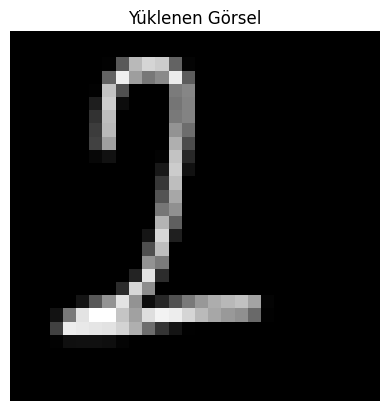

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Model prediction: 2


In [8]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# lad model
model = load_model("mnist_model.h5")

# name of the png doc
image_path = "digit.png"  # rename it

# process the figure
image = Image.open(image_path).convert('L')  # black-white
image = image.resize((28, 28))  # 28x28
image_array = np.array(image)
image_array = 255 - image_array
image_array = image_array / 255.0  # Normalization

# visualize
plt.imshow(image_array, cmap='gray')
plt.title("Yüklenen Görsel")
plt.axis('off')
plt.show()

# predict
image_array = np.expand_dims(image_array, axis=0)  # (1, 28, 28)
predicted_probs = model.predict(image_array)
predicted_label = np.argmax(predicted_probs)

print(f"Model prediction: {predicted_label}")
